### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

#visulaisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.utils import resample
# nlp
import nltk
from nltk.corpus import stopwords
import re  
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import spacy
from nltk.tokenize import word_tokenize
sp = spacy.load('en_core_web_sm')

In [3]:
#pickle & joblib&tqdm
import pickle
import joblib
from tqdm import tqdm

In [4]:
#sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;  
    color: black !important;
}
</style>

In [7]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Importing train dataset
df = pd.read_csv("train.csv")

In [10]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [11]:
# Checking dataframe shape
df.shape

(159571, 8)

In [12]:
# Checking column names
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

<AxesSubplot:>

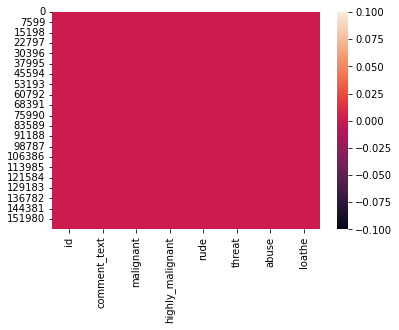

In [13]:
#visualising the null values
sns.heatmap(df.isnull())

In [14]:
# No null values in the dataset

In [15]:
cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']

In [16]:
# Lets create a single column which will have two values Toxic or non toxic

df['Toxic']=df[cols].max(axis=1).apply(lambda x: "Toxic" if x == 1 else "Non-Toxic")

In [17]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Non-Toxic
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,Non-Toxic
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Non-Toxic
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,Non-Toxic
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,Non-Toxic


In [18]:
# Checking if the data is balanced or not

clean = len(df[df.Toxic=="Non-Toxic"])
toxic = len(df[df.Toxic=="Toxic"])

In [19]:
print("Toxic Comments count:",toxic)
print("toxic percentage %.2f"%(toxic/len(df)*100))

Toxic Comments count: 16225
toxic percentage 10.17


##### Data is highly imbalanced

In [20]:
df= df[['id','comment_text','Toxic']]

In [21]:
df.head()

,id,comment_text,Toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,Non-Toxic
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,Non-Toxic
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",Non-Toxic
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",Non-Toxic
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",Non-Toxic


In [22]:
count = df.comment_text.str.len()

In [23]:
count.describe()

count    159571.000000
mean        394.138847
std         590.725381
min           5.000000
25%          96.000000
50%         205.000000
75%         436.000000
max        5000.000000
Name: comment_text, dtype: float64

In [24]:
## Average word-length for a comment is ~394

In [25]:
#count list contains the number of the counts for the labels

count=[clean,toxic]

In [26]:
count

[143346, 16225]

### EDA

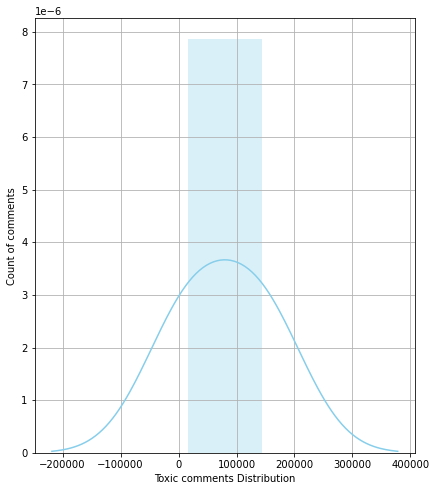

In [27]:
#toxic comment distribution by removing the clean coments

plt.figure(figsize=(15, 8))
plt.subplot(121)

ax= sns.distplot(count,kde=True,color="skyblue",hist_kws={"linewidth": 10,'alpha':0.3})
ax.set(xlabel='Toxic comments Distribution', ylabel='Count of comments')

plt.grid(True)

Mean length of comment before cleaning data: 394.139


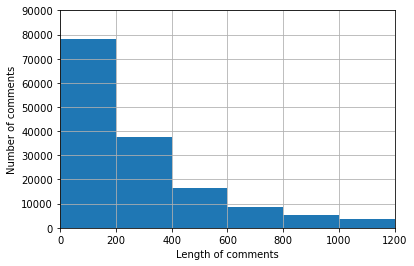

In [28]:
# Average length decreaing while number of words/characters increasing

comment=df['comment_text']

x = [len(comment[i]) for i in range(comment.shape[0])]
print('Mean length of comment before cleaning data: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

In [29]:
cl = df[df.Toxic=="Non-Toxic"]
ntox = cl.comment_text.str.len()
t = df[df.Toxic=="Toxic"]
tox = t.comment_text.str.len()

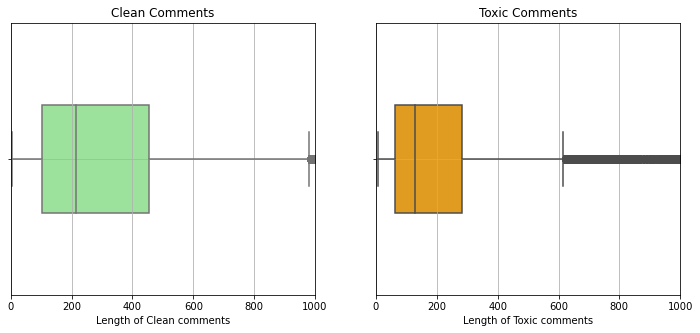

In [30]:
#the most comments are upto 400 characters range and the comments haivng higher range are clean

plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.boxplot(x=ntox,orient="h",color='lightgreen')
plt.axis([0, 1000,-1,1])
plt.xlabel('Length of Clean comments')
plt.title("Clean Comments")
plt.grid(True)

plt.subplot(122)
sns.boxplot(x=tox,orient="h",color='orange')
plt.axis([0, 1000,-1,1])
plt.xlabel('Length of Toxic comments')
plt.title("Toxic Comments")
plt.grid(True)

In [31]:
# Clean comments have higher word length then toxic comments.

#### Wordclouds

In [32]:
from wordcloud import WordCloud

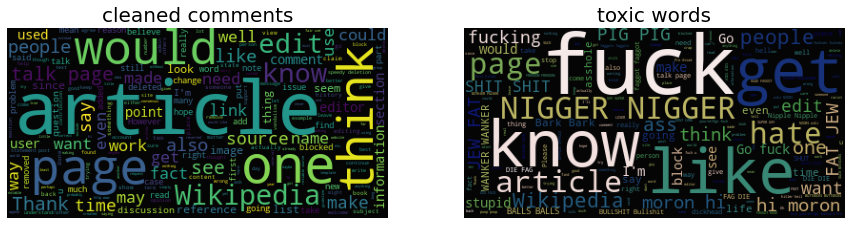

In [33]:
#wordcloud visualisation to check the most common words in clean and toxic comments

#wordcloud for clean comments
plt.figure(figsize=(15, 5))
plt.subplot(121)
stopword = set(stopwords.words("english"))
subset=df[df.Toxic=='Non-Toxic']
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=1000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("cleaned comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)

#frequent words in toxic comments

plt.subplot(122)
subset=df[df.Toxic=='Toxic']
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=1000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("toxic words", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth'), alpha=0.98)

### Data Preprocessing

In [34]:
comm = df['comment_text']

In [35]:
# text clening functions that replace short forms to full forms

def decontracted(phrase):
# specific
    phrase = re.sub(r"won’t", "will not", phrase)
    phrase = re.sub(r"can’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [36]:
# to remove the <.?/; and any numerical values from the text

def stripunc(X):
    return re.sub('[^A-Za-z]+',' ', str(X), flags=re.MULTILINE|re.DOTALL)

In [37]:
comm = comm.apply(decontracted) #cleaning functions are being applied on the text

comm = comm.apply(stripunc)

In [38]:
#striping and lowering fn

def strip_lower(text):
    text = text.apply(lambda x:x.strip().lower())
    return text

In [39]:
comm = strip_lower(comm)

In [40]:
#spacy stopwords....
stop_rots = sp.Defaults.stop_words

In [41]:
#removing some words because it may change the non-toxic to toxic....
stop_rots.remove("n't")

stop_rots.remove("no")

stop_rots.remove("not")

In [42]:
#function removes the stopwords and lemmatize the text...
#wordnet lemmatizer has been used

def lemmatize(text):
    lm= WordNetLemmatizer()
    text = text.apply(lambda x: " ".join([lm.lemmatize(word,pos='v') for word in x.split(" ") if word not in stop_rots]))
    return text

In [43]:
df['comments'] = lemmatize(comm)

In [44]:
df = df[['id','comments','Toxic']]

In [45]:
df.head()

,id,comments,Toxic
0,0000997932d777bf,explanation edit username hardcore metallica f...,Non-Toxic
1,000103f0d9cfb60f,d aww match background colour seemingly stick ...,Non-Toxic
2,000113f07ec002fd,hey man not try edit war guy constantly remove...,Non-Toxic
3,0001b41b1c6bb37e,not real suggestions improvement wonder sectio...,Non-Toxic
4,0001d958c54c6e35,sir hero chance remember page,Non-Toxic


In [46]:
df.isnull().sum()

id          0
comments    0
Toxic       0
dtype: int64

In [47]:
df["Toxic"].value_counts()

Non-Toxic    143346
Toxic         16225
Name: Toxic, dtype: int64

- Under sampling of the non-toxic data, as the comments of longer length are moslty clean and donot contains the less amount of data.So removed the comments whose length >50.

- And somehow it improves the F1 score by little undersmapling...

In [48]:
#as most of comments larger are clean so we are undersampling

df = df[df.comments.str.len()<400]

In [49]:
df.head()

,id,comments,Toxic
0,0000997932d777bf,explanation edit username hardcore metallica f...,Non-Toxic
1,000103f0d9cfb60f,d aww match background colour seemingly stick ...,Non-Toxic
2,000113f07ec002fd,hey man not try edit war guy constantly remove...,Non-Toxic
3,0001b41b1c6bb37e,not real suggestions improvement wonder sectio...,Non-Toxic
4,0001d958c54c6e35,sir hero chance remember page,Non-Toxic


In [50]:
print("Data shape after removing the comments",df.shape)

Data shape after removing the comments (138412, 3)


### Feature engineering

In [51]:
df.head()

,id,comments,Toxic
0,0000997932d777bf,explanation edit username hardcore metallica f...,Non-Toxic
1,000103f0d9cfb60f,d aww match background colour seemingly stick ...,Non-Toxic
2,000113f07ec002fd,hey man not try edit war guy constantly remove...,Non-Toxic
3,0001b41b1c6bb37e,not real suggestions improvement wonder sectio...,Non-Toxic
4,0001d958c54c6e35,sir hero chance remember page,Non-Toxic


In [52]:
# Dropping the id column
df = df.drop("id",axis=1)

In [53]:
df.head()

,comments,Toxic
0,explanation edit username hardcore metallica f...,Non-Toxic
1,d aww match background colour seemingly stick ...,Non-Toxic
2,hey man not try edit war guy constantly remove...,Non-Toxic
3,not real suggestions improvement wonder sectio...,Non-Toxic
4,sir hero chance remember page,Non-Toxic


In [54]:
df["Toxic"].value_counts()

Non-Toxic    123418
Toxic         14994
Name: Toxic, dtype: int64

In [55]:
X = df[['comments']]
y = df[['Toxic']]

In [56]:
X.head()

,comments
0,explanation edit username hardcore metallica f...
1,d aww match background colour seemingly stick ...
2,hey man not try edit war guy constantly remove...
3,not real suggestions improvement wonder sectio...
4,sir hero chance remember page


In [57]:
y.head()

,Toxic
0,Non-Toxic
1,Non-Toxic
2,Non-Toxic
3,Non-Toxic
4,Non-Toxic


In [58]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.20,random_state =0, shuffle =False)

In [59]:
X_train.shape

(110729, 1)

In [60]:
X_test.shape

(27683, 1)

In [61]:
y_train.shape

(110729, 1)

In [62]:
y_test.shape

(27683, 1)

In [63]:
# tfidf vectoriser has been used as it is far better than bag of words approach.

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1,2),min_df=3, max_df=0.9,use_idf=True,smooth_idf=1, sublinear_tf=1 )

In [64]:
train = tf.fit_transform(X_train['comments'])

In [65]:
test = tf.transform(X_test['comments'])

In [66]:
print("Comments Dimensions:",train.shape)
print("Non-Zeros:",train[0].nonzero())

Comments Dimensions: (110729, 108893)
Non-Zeros: (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([ 67572,  92705,  93520,  78649,  63289,  31166,  60282,  63758,
        80213,  57015,  39521,  27860,  30906,  79960,  66790,  92452,
        93427,  78321,  31160,  26104, 108632,  60039, 102315,  35801,
        16756, 101323,  61619,  80060,  31933,  57014,  39519, 100531,
        27134,  30899]))


In [67]:
test = tf.transform(X_test['comments'])
print("Comments Dimensions:",test.shape)
print("Non-Zeros:",test[0].nonzero())

Comments Dimensions: (27683, 108893)
Non-Zeros: (array([0, 0, 0, 0, 0, 0, 0]), array([95940, 59303, 54465, 32857, 28889, 10790,  7950]))


#### SMOTE (Oversampling)

Applying SMOTE for the sythetic data points generation beacuse of the class imbalacing problem...

In [68]:
y = y_train.to_numpy()

In [69]:
y

array([['Non-Toxic'],
       ['Non-Toxic'],
       ['Non-Toxic'],
       ...,
       ['Non-Toxic'],
       ['Non-Toxic'],
       ['Non-Toxic']], dtype=object)

In [70]:
# applying the smote to the miority class only.

sm = SMOTE(random_state=10,sampling_strategy='minority',k_neighbors=15,n_jobs=-1)

sam_train, sam_y = sm.fit_resample(train, y.ravel())  #train is tfidf output maxtrix and y is numpy.ndarray()

In [71]:
#printing the shapes of the resampled x and y
print(sam_train.shape)
print(sam_y.shape)

(197432, 108893)
(197432,)


### Machine Learning

#### Logistic Regression

In [72]:
# Hyperparameter tunning using Grid Search CV'''

model = LogisticRegression(class_weight='balanced')
penalty = ['l2','l1']
c_values = [10, 1.0, 0.1]
solvers = ['lbfgs', 'sag']

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=5,verbose=1, scoring='f1_macro',error_score=0)

grid_result = grid_search.fit(sam_train, sam_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [73]:
print("Best params are:",grid_result.best_params_)

Best params are: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [74]:
print("Best estimators are:",grid_result.best_estimator_)

Best estimators are: LogisticRegression(C=10, class_weight='balanced')


In [75]:
#predciting the test set...
best = grid_result.best_estimator_.predict(test)
pre = grid_result.predict(test)

In [76]:
print("Accuracy on test set is: %.2f"%accuracy_score(pre, y_test))

Accuracy on test set is: 0.93


#### Classification report & Confusion matrix

In [77]:
print("Classification Report....")
target_names = ['0','1']
print(classification_report(y_test, pre, target_names=target_names))

Classification Report....
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     24702
           1       0.65      0.78      0.71      2981

    accuracy                           0.93     27683
   macro avg       0.81      0.87      0.83     27683
weighted avg       0.94      0.93      0.93     27683



F1- Score with Logistic regression is 0.96 for non-toxic and 0.71 for toxic

In [78]:
print("F1-score for logistic regression is:",f1_score(y_test, pre, average='macro'))

F1-score for logistic regression is: 0.8343869356894433


In [79]:
# confusion matrix function
def conf_mat(true,pred):
    labels = ['Non-Toxic', 'Toxic']
    cm = confusion_matrix(y_test, pred, labels)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True,cmap="summer",fmt='g', ax = ax) 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

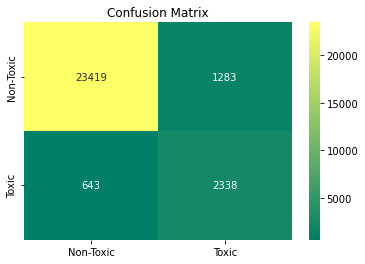

In [80]:
conf_mat(y_test,pre)

In [81]:
# Saving the model

with open("model_toxic_LR","wb") as f:
    
    pickle.dump(grid_result,f)

### Random Forest

In [82]:
# Hyperparameter tunning using Grid Search CV

params ={'min_samples_leaf': [5],'min_samples_split': [12],'n_estimators': [100,150]}

model = GridSearchCV(RandomForestClassifier(oob_score=True,n_jobs=-1), param_grid=params,cv=5, n_jobs=-1, 
                     scoring='f1_macro',return_train_score=True,verbose=1)
model = model.fit(sam_train, sam_y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [83]:
print("Best params are:",model.best_params_)

Best params are: {'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 150}


In [84]:
print("Best estimators are:",model.best_estimator_)

Best estimators are: RandomForestClassifier(min_samples_leaf=5, min_samples_split=12,
                       n_estimators=150, n_jobs=-1, oob_score=True)


In [85]:
print("Best score is:",model.best_score_)

Best score is: 0.9183544023942328


In [86]:
#generating the predicted results
pred = model.best_estimator_.predict(test)

In [87]:
print("Accuracy on test set is: %.2f"%accuracy_score(pred, y_test))

Accuracy on test set is: 0.94


- Classification report & Confusion matrix


- F1- Score with Random forest is 0.96 for non-toxic and 0.67 for toxic, which is less than Logistic regression

In [88]:
print("Classification Report....")
target_names = ['0','1']
print(classification_report(y_test, pred, target_names=target_names))

Classification Report....
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     24702
           1       0.76      0.63      0.69      2981

    accuracy                           0.94     27683
   macro avg       0.86      0.80      0.83     27683
weighted avg       0.94      0.94      0.94     27683



In [89]:
print("F1-score for Random Forest is:")

f1_score(y_test, pred, average='macro')

F1-score for Random Forest is:


0.827584197009162

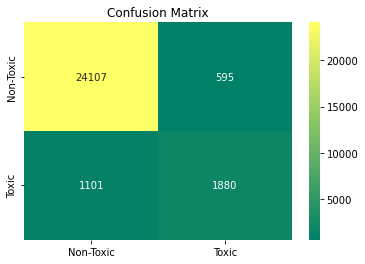

In [90]:
conf_mat(y_test,pred)

In [91]:
# Saving the model

with open("model_toxic_RFR.pkl","wb") as f:
    
    pickle.dump(model,f)

### Linear SVC

In [92]:
from sklearn.svm import LinearSVC

#Hyperparameter tunning using Grid Search CV

params ={'C': [0.01,0.1,1.0,10],'max_iter': [1000,1500],'dual':[True,False]}

clf = GridSearchCV(LinearSVC(class_weight='balanced'), param_grid=params,cv=5, n_jobs=-1, 
                     scoring='f1_macro',return_train_score=True,verbose=1)

clf = clf.fit(sam_train, sam_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [93]:
print("Best params are:",clf.best_params_)

Best params are: {'C': 10, 'dual': True, 'max_iter': 1000}


In [94]:
print("Best estimators are:",clf.best_estimator_)

Best estimators are: LinearSVC(C=10, class_weight='balanced')


In [95]:
print("Best score is:",clf.best_score_)

Best score is: 0.9653922645133395


In [96]:
svc_pred = clf.best_estimator_.predict(test)

In [97]:
print("Accuracy on test set is: %.2f"%accuracy_score(svc_pred, y_test))

Accuracy on test set is: 0.92


- Classification report & Confusion matrix


- F1- Score with Linear SVC is 0.95 for non-toxic and 0.67 for toxic

In [98]:
print("Classification Report....")
target_names = ['0','1']
print(classification_report(y_test, svc_pred, target_names=target_names))

Classification Report....
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     24702
           1       0.61      0.74      0.67      2981

    accuracy                           0.92     27683
   macro avg       0.79      0.84      0.81     27683
weighted avg       0.93      0.92      0.92     27683



In [99]:
print("F1-score for SVC is:")
f1_score(y_test, pred, average='macro')

F1-score for SVC is:


0.827584197009162

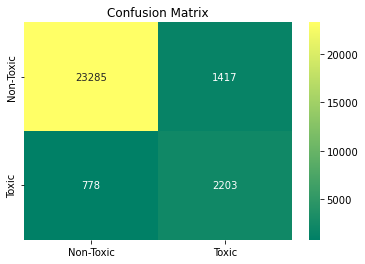

In [100]:
conf_mat(y_test,svc_pred)

In [101]:
# Saving the model

with open("model_toxic_SVC.pkl","wb") as f:
    
    pickle.dump(clf,f)

### Naive Bays

In [102]:
#Hyperparameter tunning using Grid Search CV

params = {'alpha':[10,100]}
nav = GridSearchCV(MultinomialNB(), param_grid=params,cv=5,n_jobs=-1,
                   scoring='accuracy',verbose=1)
nv = nav.fit(sam_train, sam_y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [103]:
print("Best params are:",nav.best_params_)

Best params are: {'alpha': 10}


In [104]:
print("Best estimators are:",nav.best_estimator_)

Best estimators are: MultinomialNB(alpha=10)


In [105]:
print("Best score is:",nav.best_score_)

Best score is: 0.8777655793860468


In [106]:
pr =nv.best_estimator_.predict(test)

In [107]:
print("Accuracy on test set is: %.2f"%accuracy_score(pr, y_test))

Accuracy on test set is: 0.94


- Classification report & Confusion matrix


- F1- Score with Naive bays is 0.96 for non-toxic and 0.72 for toxic and it is highest

In [108]:
print("Classification Report....")
target_names = ['0','1']
print(classification_report(y_test, pr, target_names=target_names))

Classification Report....
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     24702
           1       0.70      0.75      0.72      2981

    accuracy                           0.94     27683
   macro avg       0.84      0.85      0.84     27683
weighted avg       0.94      0.94      0.94     27683



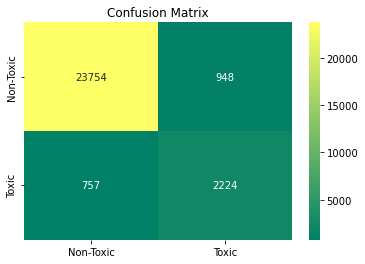

In [109]:
conf_mat(y_test,pr)

In [110]:
print("F1-Score of Naive Bays:",f1_score(y_test, pr, average='macro'))

F1-Score of Naive Bays: 0.8441270406865529


In [111]:
# Saving the model

with open("model_toxic_NB.pkl","wb") as f:
    
    pickle.dump(nav,f)

### Testing

In [112]:
df_test = pd.read_csv("test.csv")

In [113]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [114]:
with open("model_toxic_NB.pkl","rb") as f:
    
    toxic = pickle.load(f)

In [115]:
# as above we used it inside function
lm= WordNetLemmatizer()

In [116]:
#clean function

def clean(text):
    text = decontracted(text)
    text = stripunc(text)
    text = text.strip().lower()
    text = text.split(" ")
    word= [" ".join([lm.lemmatize(w,pos='v') for w in text if w not in stop_rots])]
    text = tf.transform(word)
    return text

In [117]:
df_test["comment_text"][0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [118]:
toxic.predict(clean(df_test["comment_text"][0]))

array(['Toxic'], dtype='<U9')

In [119]:
# Creating a pickle file for the tfIdf 
pickle.dump(tf, open('tf-transform.pkl', 'wb'))